In [ ]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-tc3xg_q1
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-tc3xg_q1
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0da14bed189bacc104c76ef11d64f9f986fdbff9d_-cp36-none-any.whl size=115561 sha256=4b99b11e790e5eba506df18c9e7695623e2c0c732f62994ccb1403e3cd57cb05
  Stored in directory: /tmp/pip-ephem-wheel-cache-qy5cfpwv/wheels/eb/1b/35/fce87697be00d2fc63e0b4b395b0d9c7e391a10e98d9a0d97f
Successfully built tensorflow-docs


In [ ]:
from numpy import loadtxt
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.2.0


In [ ]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [ ]:
# load the dataset
from google.colab import files
uploaded = files.upload()
# dataset = loadtxt('ForwardTrain.csv', delimiter=',')
# test = loadtxt('ForwardTest.csv', delimiter=',')

Saving ExtraData.csv to ExtraData.csv


In [ ]:
column_names = ['T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16', 'T17','T18','T19','Radius','X','Y']
raw_dataset = pd.read_csv('ExtraData.csv', names=column_names,
                      na_values = "?", comment='\t',
                      sep=",", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19,Radius,X,Y
600,318.06,333.08,348.01,362.77,377.25,391.29,404.68,417.10,428.14,437.29,443.90,447.25,446.56,441.10,430.30,413.87,391.97,365.31,335.10,0.04,0.15,0.11
601,319.58,336.14,352.68,369.15,385.47,401.51,417.06,431.80,445.31,456.98,466.05,471.59,472.55,467.87,456.59,438.10,412.34,380.07,342.88,0.04,0.15,0.12
602,320.97,338.98,357.04,375.14,393.27,411.32,429.11,446.37,462.63,477.24,489.33,497.74,501.16,498.13,487.20,467.17,437.44,398.63,352.75,0.04,0.15,0.13
603,322.21,341.49,360.92,380.54,400.37,420.36,440.41,460.25,479.46,497.32,512.81,524.58,531.06,530.58,521.35,501.20,468.23,422.20,365.55,0.04,0.15,0.14
604,323.27,343.66,364.30,385.27,406.67,428.53,450.79,473.27,495.56,516.89,536.00,551.06,560.08,561.72,555.33,538.46,505.51,452.67,382.63,0.04,0.15,0.15


In [ ]:
train_dataset = dataset.sample(frac=0.95,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

In [ ]:
train_stats = train_dataset.describe()
for i in range(19,22):
  train_stats.pop(column_names[i])
# train_stats.pop('T1')  
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
T1,575.0,320.844104,14.256363,304.79,310.715,316.49,325.925,387.41
T2,575.0,338.253861,27.952960,306.56,318.245,329.63,348.080,465.95
T3,575.0,354.790383,40.566859,308.28,325.625,342.45,369.135,533.32
T4,575.0,370.021704,51.678900,309.93,332.725,354.38,389.380,592.91
T5,575.0,383.555165,61.040464,311.47,338.595,365.48,408.135,636.43
T6,575.0,395.059478,68.573092,312.88,344.460,374.77,425.530,674.72
T7,575.0,404.268609,74.301317,314.12,348.730,382.42,438.670,698.76
T8,575.0,410.977043,78.292462,315.15,352.525,388.18,449.120,718.01
T9,575.0,415.038713,80.618333,315.93,354.455,391.29,454.885,726.17
T10,575.0,416.368400,81.331781,316.43,355.390,392.06,457.760,731.11


In [ ]:
column_names[19:22]

['Radius', 'X', 'Y']

In [ ]:
train_labels = train_dataset[column_names[19:20]]
test_labels = test_dataset[column_names[19:20]]
train_data = train_dataset[column_names[0:19]]
test_data = test_dataset[column_names[0:19]]
train_data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
571,346.19,389.52,433.06,476.78,520.43,563.43,604.61,642.03,672.98,694.59,705.46,706.32,697.14,674.72,636.43,583.66,520.43,450.76,377.62
128,321.14,338.25,353.40,365.82,375.03,380.87,383.49,383.28,380.78,376.49,370.92,364.45,357.39,349.95,342.28,334.49,326.64,318.77,310.89
28,313.45,323.56,332.99,341.41,348.49,353.99,357.73,359.65,359.81,358.37,355.56,351.64,346.87,341.44,335.56,329.34,322.91,316.34,309.69
183,319.57,335.95,351.91,367.18,381.40,394.15,404.90,413.12,418.29,420.06,418.29,413.12,404.90,394.15,381.40,367.18,351.91,335.95,319.57
459,326.97,350.92,374.83,398.60,422.09,445.02,466.96,487.27,505.07,519.24,528.48,531.47,527.06,514.51,493.70,465.21,430.28,390.49,347.53


In [ ]:
#Normalizing the model
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_data)
normed_test_data = norm(test_data)
normed_test_data.tail()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,T19
543,0.546836,0.555438,0.569914,0.589569,0.612624,0.636992,0.659765,0.678519,0.691298,0.696549,0.693891,0.683567,0.667036,0.646223,0.623524,0.601774,0.582975,0.568995,0.560528
544,0.876514,0.889929,0.912558,0.943099,0.979102,1.016587,1.051682,1.080602,1.100014,1.107951,1.103428,1.087249,1.061259,1.028745,0.993294,0.959162,0.929726,0.907719,0.894468
551,-0.351008,-0.351085,-0.351774,-0.351627,-0.350672,-0.348526,-0.344793,-0.339586,-0.333407,-0.326298,-0.318703,-0.310890,-0.303224,-0.295902,-0.289159,-0.282989,-0.277416,-0.273287,-0.270769
559,1.988999,2.039360,2.124138,2.242468,2.389314,2.556404,2.731330,2.899423,3.046593,3.163973,3.248557,3.298394,3.307599,3.273914,3.205463,3.119331,3.034180,2.965422,2.921553
599,-0.305415,-0.298497,-0.285957,-0.266873,-0.240089,-0.204446,-0.159467,-0.105081,-0.041786,0.029160,0.105749,0.185376,0.264825,0.340999,0.410526,0.471104,0.520360,0.557040,0.580422


In [ ]:
#Building the model
def build_model(neurons,act):
  model = keras.Sequential([
    layers.Dense(neurons, activation=act, input_shape=[len(train_data.keys())]),
    layers.Dense(1)  
     ])

  optimizer = tf.keras.optimizers.RMSprop(0.0005)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [ ]:
model = build_model(128,'relu')

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               2560      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 129       
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
example_batch = train_data[:10]
example_result = model.predict(example_batch)
example_result

array([[-127.306854],
       [-131.51727 ],
       [-125.87613 ],
       [-121.823395],
       [-116.45044 ],
       [-127.635574],
       [-127.880066],
       [-146.12555 ],
       [-134.67355 ],
       [-180.44888 ]], dtype=float32)

In [ ]:
EPOCHS = 100

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0151,  mae:0.0579,  mse:0.0151,  val_loss:0.0008,  val_mae:0.0240,  val_mse:0.0008,  
....................................................................................................

In [ ]:
import pprint
pprint.pprint(history.history)

Streaming output truncated to the last 5000 lines.
         0.17953142523765564,
         0.0994972288608551,
         0.06539430469274521,
         0.04796209931373596,
         0.03340274095535278,
         0.028528006747364998,
         0.021056145429611206,
         0.020566482096910477,
         0.01890118233859539,
         0.019162321463227272,
         0.018131282180547714,
         0.020580265671014786,
         0.017568280920386314,
         0.017684437334537506,
         0.018478862941265106,
         0.018088137730956078,
         0.01654716208577156,
         0.018164118751883507,
         0.01851150393486023,
         0.015894530341029167,
         0.01735648326575756,
         0.015784362331032753,
         0.017089519649744034,
         0.01812848262488842,
         0.012385657988488674,
         0.015395253896713257,
         0.020314861088991165,
         0.01523454487323761,
         0.01704219914972782,
         0.013627110049128532,
         0.01644829660654068,
  

In [ ]:
loss_dict = {'tanh':[],'sigmoid':[],'relu':[]}

In [ ]:
for act in ['tanh','relu','sigmoid']:
  for i in range(1,129):  
    model = build_model(i,act)
    EPOCHS = 1000
    history = model.fit(
      normed_train_data, train_labels,
      epochs=EPOCHS, validation_split = 0.2, verbose=0,
      callbacks=[tfdocs.modeling.EpochDots()])
    loss_dict[act].append(history.history['val_loss'][-1])

Streaming output truncated to the last 5000 lines.
Epoch: 0, loss:0.2237,  mae:0.3606,  mse:0.2237,  val_loss:0.1122,  val_mae:0.2521,  val_mse:0.1122,  
....................................................................................................
Epoch: 100, loss:0.0002,  mae:0.0089,  mse:0.0002,  val_loss:0.0002,  val_mae:0.0093,  val_mse:0.0002,  
....................................................................................................
Epoch: 200, loss:0.0001,  mae:0.0073,  mse:0.0001,  val_loss:0.0000,  val_mae:0.0053,  val_mse:0.0000,  
....................................................................................................
Epoch: 300, loss:0.0002,  mae:0.0077,  mse:0.0002,  val_loss:0.0000,  val_mae:0.0052,  val_mse:0.0000,  
....................................................................................................
Epoch: 400, loss:0.0001,  mae:0.0064,  mse:0.0001,  val_loss:0.0001,  val_mae:0.0059,  val_mse:0.0001,  
......................

In [ ]:
import pickle
a_file = open("data.pkl", "wb")
pickle.dump(loss_dict, a_file)
a_file.close()

In [ ]:
files.download("data.pkl")

In [ ]:
pprint.pprint(loss_dict)

{'relu': [4.9668600695440546e-05,
          0.00012703127868007869,
          2.6004830942838453e-05,
          3.277693394920789e-05,
          0.00040784335578791797,
          4.411064583109692e-05,
          0.00012669792340602726,
          0.00010706921602832153,
          4.557632564683445e-05,
          7.86506716394797e-05,
          8.169873763108626e-05,
          0.0017814354505389929,
          3.111394107691012e-05,
          0.00015853920194786042,
          5.115818930789828e-05,
          0.00015816837549209595,
          3.792421193793416e-05,
          0.00013003713684156537,
          0.00017302011838182807,
          9.079049050342292e-05,
          9.428722114535049e-05,
          0.00012154602882219478,
          0.0001688890188233927,
          0.00013672912609763443,
          4.893446748610586e-05,
          0.00014628845383413136,
          0.0006011672667227685,
          0.00018328995793126523,
          8.245473145507276e-05,
          5.7844816183205694e-

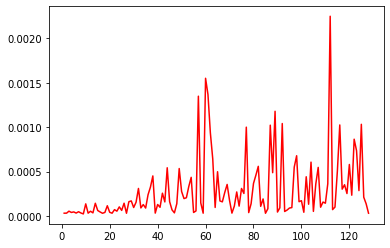

In [ ]:
loss_dict['relu']=loss_dict['relu'][4:]
loss_dict['tanh']=loss_dict['tanh'][4:]
loss_dict['sigmoid']=loss_dict['sigmoid'][4:]
neuron_count = np.linspace(1,128,128)


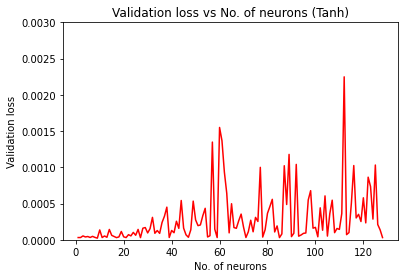

In [ ]:
plt.plot(neuron_count,loss_dict['tanh'],color = 'r')
plt.xlabel("No. of neurons")
plt.ylabel("Validation loss")
plt.title("Validation loss vs No. of neurons (Tanh)")
plt.ylim(0,0.003)
plt.show()

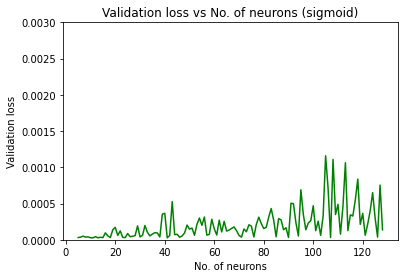

In [ ]:
plt.plot(neuron_count[4:],loss_dict['sigmoid'],color = 'g')
plt.xlabel("No. of neurons")
plt.ylabel("Validation loss")
plt.title("Validation loss vs No. of neurons (sigmoid)")
plt.ylim(0,0.003)
plt.show()

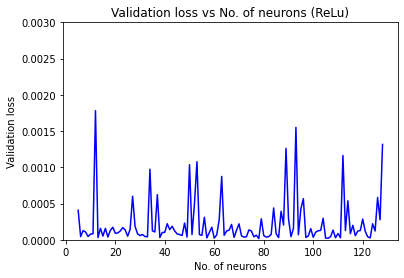

In [ ]:
plt.plot(neuron_count[4:],loss_dict['relu'],color = 'b')
plt.xlabel("No. of neurons")
plt.ylabel("Validation loss")
plt.ylim(0,0.003)
plt.title("Validation loss vs No. of neurons (ReLu)")
plt.show()

In [ ]:
# EPOCHS = 2000
# # The patience parameter is the amount of epochs to check for improvement
# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=50)

# history = model.fit(normed_train_data, train_labels, 
#                     epochs=EPOCHS, validation_split = 0.2, verbose=0, 
#                     callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, loss:0.0093,  mae:0.0624,  mse:0.0093,  val_loss:0.0044,  val_mae:0.0474,  val_mse:0.0044,  
....................................................................................................
Epoch: 100, loss:0.0003,  mae:0.0112,  mse:0.0003,  val_loss:0.0001,  val_mae:0.0057,  val_mse:0.0001,  
....................................................................................................
Epoch: 200, loss:0.0001,  mae:0.0079,  mse:0.0001,  val_loss:0.0000,  val_mae:0.0044,  val_mse:0.0000,  
..........................................................................

In [ ]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
1995,0.000009,0.001931,0.000009,0.000009,0.001940,0.000009,1995
1996,0.000006,0.001696,0.000006,0.000011,0.002162,0.000011,1996
1997,0.000006,0.001534,0.000006,0.000030,0.004143,0.000030,1997
1998,0.000007,0.001742,0.000007,0.000006,0.001695,0.000006,1998
1999,0.000007,0.001775,0.000007,0.000006,0.001895,0.000006,1999


In [ ]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [Params]')

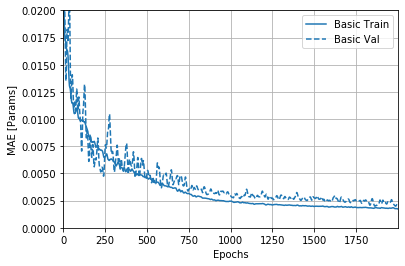

In [ ]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 0.02])
plt.ylabel('MAE [Params]')

Text(0, 0.5, 'MSE [Params^2]')

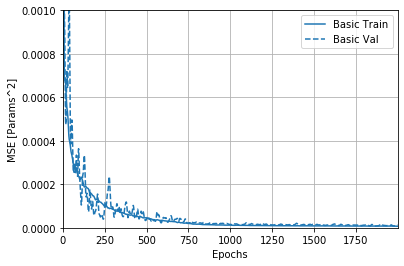

In [ ]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 0.001])
plt.ylabel('MSE [Params^2]')

Text(0, 0.5, 'MAE [Params]')

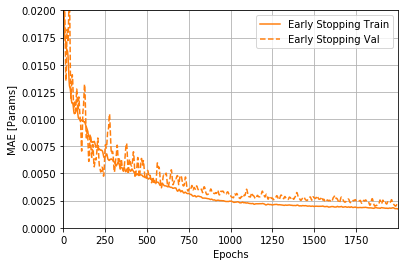

In [ ]:
plotter.plot({'Early Stopping': history}, metric = "mae")
plt.ylim([0, 0.02])
plt.ylabel('MAE [Params]')

In [ ]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)

print("Testing set Mean Abs Error: {:5.2f} meter".format(mae))

Testing set Mean Abs Error:  0.00 meter


In [ ]:
test_predictions = model.predict(normed_test_data)
test_predictions_flat = model.predict(normed_test_data).flatten()
np.shape(test_predictions)
test_predictions

array([[0.02047298],
       [0.02327695],
       [0.01927895],
       [0.02082534],
       [0.02176806],
       [0.02326039],
       [0.02865139],
       [0.02768464],
       [0.02606218],
       [0.02600436],
       [0.02605797],
       [0.02589243],
       [0.03068412],
       [0.03303097],
       [0.03181783],
       [0.02926494],
       [0.03054647],
       [0.0310229 ],
       [0.03619271],
       [0.03605153],
       [0.03603234],
       [0.03637188],
       [0.03289588],
       [0.03877619],
       [0.04073747],
       [0.03962784],
       [0.04023526],
       [0.03806095],
       [0.04070656],
       [0.03913157]], dtype=float32)

In [ ]:
# test_labels['X']
np.shape(test_labels)
test_labels_flat = test_labels.values.flatten()

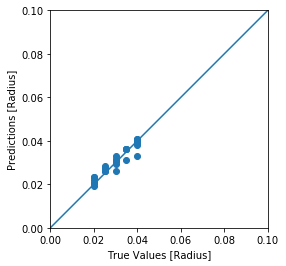

In [ ]:
    a = plt.axes(aspect='equal')
plt.scatter(test_labels['Radius'], test_predictions_flat[0:1133:1])
plt.xlabel('True Values [Radius]')
plt.ylabel('Predictions [Radius]')
lims = [0,0.1]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

KeyError: ignored

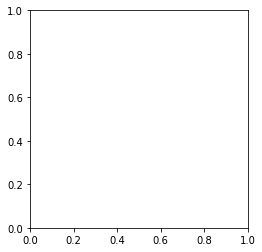

In [ ]:
# a = plt.axes(aspect='equal')
# plt.scatter(test_labels['X'], test_predictions_flat[1:1133:3])
# plt.xlabel('True Values [X]')
# plt.ylabel('Predictions [X]')
# lims = [0,0.2]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

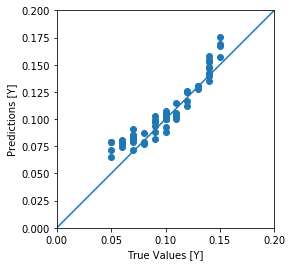

In [ ]:
# a = plt.axes(aspect='equal')
# plt.scatter(test_labels['Y'], test_predictions_flat[2:1133:3])
# plt.xlabel('True Values [Y]')
# plt.ylabel('Predictions [Y]')
# lims = [0,0.2]
# plt.xlim(lims)
# plt.ylim(lims)
# _ = plt.plot(lims, lims)

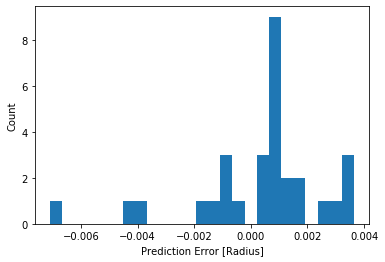

In [ ]:
error = test_predictions_flat[0:1133] - test_labels_flat[0:1133]
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [Radius]")
_ = plt.ylabel("Count")

In [ ]:
def lsr(x,y):
  diff = x-y
  return np.sum(np.square(diff))

In [ ]:
def rsquare(x,y):
  std = np.std(y)
  least_square = lsr(x,y)
  return (std-least_square)/std

In [ ]:
lsr(test_labels['Radius'],test_predictions[:,0])

0.00015939664481544324

In [ ]:
rsquare(test_labels['Radius'],test_predictions[:,0])

0.9759375224833515

In [ ]:
np.std(test_predictions[:,1])

0.0268932